<a href="https://colab.research.google.com/github/inrap8206/Dacon/blob/main/%5B%EB%8D%B0%EC%9D%B4%EC%BD%98%5D%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 생성

In [ ]:
! pip install finance-datareader

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive, files
drive.mount('/content/drive')
import FinanceDataReader as fdr
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

stock_list = pd.read_csv('./drive/My Drive/Colab Notebooks/dacon/주식/Stock_List.csv')
sub = pd.read_csv('./drive/My Drive/Colab Notebooks/dacon/주식/sample_submission.csv')
stock_list['종목코드'] = stock_list['종목코드'].apply(lambda x : str(x).zfill(6))
stock_list['상장시장'].value_counts()
stock_list

Mounted at /content/drive


,종목명,종목코드,상장시장
0,삼성전자,005930,KOSPI
1,SK하이닉스,000660,KOSPI
2,NAVER,035420,KOSPI
3,카카오,035720,KOSPI
4,삼성바이오로직스,207940,KOSPI
...,...,...,...
371,더네이쳐홀딩스,298540,KOSDAQ
372,코엔텍,029960,KOSDAQ
373,원익홀딩스,030530,KOSDAQ
374,웹케시,053580,KOSDAQ


# 레퍼런스
https://dacon.io/codeshare/2570?dtype=recent

In [ ]:
start_date = '20210104'
end_date = '20210827'

start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

print(f'WEEKDAY of "start_date" : {start_weekday}')
print(f'NUM of WEEKS to "end_date" : {max_weeknum}')
print(f'HOW MANY "Business_days" : {Business_days.shape}', )
# display(Business_days.head())

# sample_code = stock_list.loc[0,'종목코드']
# sample = fdr.DataReader(sample_code, start = start_date, end = end_date)[['Close']].reset_index()
# sample = pd.merge(Business_days, sample, how = 'outer')
# sample['weekday'] = sample.Date.apply(lambda x : x.weekday())
# sample['weeknum'] = sample.Date.apply(lambda x : x.strftime('%V'))
# sample.Close = sample.Close.ffill()
# sample = pd.pivot_table(data = sample, values = 'Close', columns = 'weekday', index = 'weeknum')
# sample

WEEKDAY of "start_date" : 0
NUM of WEEKS to "end_date" : 34
HOW MANY "Business_days" : (170, 1)


In [ ]:
lin = pd.DataFrame()
rf =  pd.DataFrame()
xgb =  pd.DataFrame()

models = [LinearRegression(), RandomForestRegressor(random_state=2020, criterion='mae'), XGBRegressor(random_state=2020, objective='reg:squarederror', eval_metric='mae')]
names = [lin, rf, xgb]

for selec_model, name in zip(models, names) :
  model = selec_model
  for code in tqdm(stock_list['종목코드'].values):
      fdr_data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
      data = pd.merge(Business_days, fdr_data, how = 'outer')
      data['weekday'] = data.Date.apply(lambda x : x.weekday())
      data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
      data.Close = data.Close.ffill()
      data = pd.pivot_table(data = data, values = 'Close', columns = 'weekday', index = 'weeknum')
      
      x = data.iloc[0:-2].to_numpy()
      y = data.iloc[1:-1].to_numpy()
      y_0 = y[:,0]
      y_1 = y[:,1]
      y_2 = y[:,2]
      y_3 = y[:,3]
      y_4 = y[:,4]

      y_values = [y_0, y_1, y_2, y_3, y_4]
      x_public = data.iloc[-2].to_numpy()
      
      predictions = []
      for y_value in y_values :
          model.fit(x,y_value)
          prediction = model.predict(np.expand_dims(x_public,0))
          predictions.append(prediction[0])
      sub.loc[:,code] = predictions * 2
  sub.isna().sum().sum()
  name = sub.iloc[:,1:]

#sub.iloc[:,1:] = rf*0.30 + xgb*0.25  + lin*0.45
sub.iloc[:,1:] = rf
public_sub = sub

  0%|          | 1/376 [00:02<13:55,  2.23s/it]


KeyboardInterrupt: ignored

In [ ]:
#model = RandomForestRegressor(random_state=2020, criterion='mae')
model = LinearRegression()

for code in tqdm(stock_list['종목코드'].values):
    fdr_data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, fdr_data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    data = pd.pivot_table(data = data, values = 'Close', columns = 'weekday', index = 'weeknum')
    
    x = data.iloc[0:-2].to_numpy()
    y = data.iloc[1:-1].to_numpy()
    y_0 = y[:,0]
    y_1 = y[:,1]
    y_2 = y[:,2]
    y_3 = y[:,3]
    y_4 = y[:,4]

    y_values = [y_0, y_1, y_2, y_3, y_4]
    x_public = data.iloc[-2].to_numpy()
    
    predictions = []
    for y_value in y_values :
        model.fit(x,y_value)
        prediction = model.predict(np.expand_dims(x_public,0))
        predictions.append(prediction[0])
    sub.loc[:,code] = predictions * 2
sub.isna().sum().sum()
sub

100%|██████████| 376/376 [03:47<00:00,  1.65it/s]


,Day,000060,000080,000100,000120,000150,000240,000250,000270,000660,000670,000720,000810,000880,000990,001230,001440,001450,001740,002380,002790,003000,003090,003380,003410,003490,003670,003800,004000,004020,004170,004370,004490,004800,004990,005250,005290,005300,005380,005385,...,273130,278280,278530,282330,285130,287410,290510,290650,292150,293490,293780,294090,294870,298000,298020,298050,298380,298540,299030,299660,299900,307950,314130,316140,319400,319660,321550,323990,326030,330590,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
0,2021-08-23,23767.257075,31294.521311,58611.512695,164505.642111,86479.845601,16794.535936,58405.635524,81115.989145,103030.252419,628581.731251,47374.575191,220679.023954,29963.734082,58150.716055,17513.397156,2223.571776,25284.693598,5209.709715,282789.340341,54053.881227,19532.827859,31905.553770,9386.705924,7753.155714,26348.462056,142634.014840,45710.210853,64375.482642,46109.683803,249788.305806,295847.554092,79961.233479,112470.876391,34350.519942,28613.520186,25407.063093,127874.622173,203512.950460,97333.831375,...,110157.921858,244241.894241,13186.455200,157861.513248,281451.493020,8299.307559,7199.790968,37547.513830,14024.836596,78679.651610,49964.148459,50485.738697,27647.896411,314824.988937,735217.321602,505105.651671,17177.065374,31873.218094,61560.509301,124656.249445,14349.138634,109143.958996,39516.416536,10574.096604,4363.171453,37319.268235,18564.454869,69357.024202,112194.597266,5774.454784,39869.405108,45045.618508,63080.203018,31793.851309,26054.588005,49660.574029,274833.695643,275144.816685,28498.826309,15861.207319
1,2021-08-24,24145.282120,31119.097654,58003.581451,164180.310865,86842.439313,17577.354982,56515.455783,83100.986857,101899.145692,628238.148413,47491.277319,221636.592379,30243.918495,59954.878234,18258.482808,2439.835394,24965.540010,5320.765967,285477.195626,53518.499550,19472.111761,33983.466632,9371.924538,7795.798734,26538.075337,144717.824630,31929.730473,64535.633845,47014.720373,246898.629479,299076.627024,83546.567011,113352.972649,34899.703546,28000.873509,25203.529263,129506.554427,205524.871917,98208.313768,...,110118.310445,246850.009624,13337.841002,158286.464356,279750.140933,8388.442083,7541.699069,37569.961856,14234.348525,79087.009919,49744.419329,53114.158714,28080.023847,319674.773132,736877.322100,501976.775846,17229.456874,31501.667958,61554.853945,121182.490857,14050.907260,110965.411840,39315.133152,10676.009519,4408.679255,37352.943241,18369.655997,69169.593017,113319.009464,5807.823660,39811.752032,45919.836874,61301.067254,32622.961268,26466.703475,49762.504734,274649.734913,278973.526719,29221.043982,17685.669044
2,2021-08-25,23905.477421,30782.465661,57397.194027,167594.678040,86189.765392,18347.490851,55446.027639,84419.205387,103244.300156,624268.454378,47467.265091,224116.992237,30347.173888,58984.942324,18113.705709,2358.360141,25914.235966,5335.744413,286549.454939,53931.061483,19451.628436,33075.431335,9687.580500,7792.790668,26436.711076,146986.425666,40346.837152,65639.891199,46742.704102,244821.363773,297821.241156,82021.511581,112219.240027,34774.593021,28277.598763,25253.570006,128382.822531,205548.792199,99017.297687,...,110205.607386,249667.156205,13350.077956,158993.865031,278122.412217,8186.010657,7374.288046,37353.664141,14281.364393,78635.853121,49079.980211,53006.557785,27994.560172,316124.594345,733932.139529,480848.636547,17591.764212,31514.278129,60088.685235,138363.794883,14517.289082,112677.268571,38000.555585,10773.319436,4553.751135,37385.699383,18618.488902,68917.206626,109120.134904,5837.232742,39184.664292,46357.552311,60779.184202,33474.820917,28064.448322,50744.670146,273313.468569,280765.296423,29622.109383,16095.442266
3,2021-08-26,23284.116058,30695.293356,56721.219077,168603.017672,83714.021033,18898.488078,54727.896905,84976.057157,100366.781889,615319.903924,47038.895766,226038.289926,31038.277355,60239.845586,18763.697192,2339.882581,25532.375478,5341.588508,292430.03912

In [ ]:
#sub.to_csv('BASELINE_rf.csv',index=False)
sub.to_csv('week2_lin.csv',index=False)


In [ ]:
#@title
# 베이스라인
#model = LinearRegression()
model = RandomForestRegressor(random_state=2020, criterion='mae')
#model = XGBRegressor(random_state=2020, objective='reg:squarederror', eval_metric='mae')
for code in tqdm(stock_list['종목코드'].values):
    fdr_data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, fdr_data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    data = pd.pivot_table(data = data, values = 'Close', columns = 'weekday', index = 'weeknum')
    
    x = data.iloc[0:-2].to_numpy()
    y = data.iloc[1:-1].to_numpy()
    y_0 = y[:,0]
    y_1 = y[:,1]
    y_2 = y[:,2]
    y_3 = y[:,3]
    y_4 = y[:,4]

    y_values = [y_0, y_1, y_2, y_3, y_4]
    x_public = data.iloc[-2].to_numpy()
    
    predictions = []
    for y_value in y_values :
        model.fit(x,y_value)
        prediction = model.predict(np.expand_dims(x_public,0))
        predictions.append(prediction[0])
    sub.loc[:,code] = predictions * 2
sub.isna().sum().sum()

In [ ]:
# best score
rf = pd.read_csv('BASELINE_rf.csv')
ar = pd.read_csv('arima200_21.csv')
lin = pd.read_csv('week2_lin.csv')
#sub.iloc[:,1:] = rf.iloc[:,1:]*0.5 + ar.iloc[:,1:]*0.5 #3.645423275
sub.iloc[:,1:] = rf.iloc[:,1:]*0.45 + ar.iloc[:,1:]*0.45 + lin.iloc[:,1:]*0.1 
sub.to_csv('rf_arima200_21_lin.csv',index=False)

In [ ]:
#xgb = pd.read_csv('BASELINE_xgb.csv')
lin = pd.read_csv('BASELINE_Linear.csv')
rf = pd.read_csv('BASELINE_rf.csv')
#sub.iloc[:,1:] = rf.iloc[:,1:]*0.30 + xgb.iloc[:,1:]*0.25  + lin.iloc[:,1:]*0.45
sub.iloc[:,1:] = rf.iloc[:,1:]*0.4 + lin.iloc[:,1:]*0.6
sub.to_csv('BASELINE_rf_lin.csv',index=False)

FileNotFoundError: ignored

# Private

In [ ]:
start_date = '20210104'
end_date = '20210903'

start_weekday = pd.to_datetime(start_date).weekday()
max_weeknum = pd.to_datetime(end_date).strftime('%V')
Business_days = pd.DataFrame(pd.date_range(start_date,end_date,freq='B'), columns = ['Date'])

print(f'WEEKDAY of "start_date" : {start_weekday}')
print(f'NUM of WEEKS to "end_date" : {max_weeknum}')
print(f'HOW MANY "Business_days" : {Business_days.shape}', )
# display(Business_days.head())

# sample_code = stock_list.loc[0,'종목코드']
# sample = fdr.DataReader(sample_code, start = start_date, end = end_date)[['Close']].reset_index()
# sample = pd.merge(Business_days, sample, how = 'outer')
# sample['weekday'] = sample.Date.apply(lambda x : x.weekday())
# sample['weeknum'] = sample.Date.apply(lambda x : x.strftime('%V'))
# sample.Close = sample.Close.ffill()
# sample = pd.pivot_table(data = sample, values = 'Close', columns = 'weekday', index = 'weeknum')
# sample

WEEKDAY of "start_date" : 0
NUM of WEEKS to "end_date" : 35
HOW MANY "Business_days" : (175, 1)


In [ ]:
#model = LinearRegression()
model = RandomForestRegressor(random_state=2020, criterion='mae')

for code in tqdm(stock_list['종목코드'].values):
    fdr_data = fdr.DataReader(code, start = start_date, end = end_date)[['Close']].reset_index()
    data = pd.merge(Business_days, fdr_data, how = 'outer')
    data['weekday'] = data.Date.apply(lambda x : x.weekday())
    data['weeknum'] = data.Date.apply(lambda x : x.strftime('%V'))
    data.Close = data.Close.ffill()
    data = pd.pivot_table(data = data, values = 'Close', columns = 'weekday', index = 'weeknum')
    
    x = data.iloc[0:-2].to_numpy()
    y = data.iloc[1:-1].to_numpy()
    y_0 = y[:,0]
    y_1 = y[:,1]
    y_2 = y[:,2]
    y_3 = y[:,3]
    y_4 = y[:,4]

    y_values = [y_0, y_1, y_2, y_3, y_4]
    x_public = data.iloc[-2].to_numpy()
    
    predictions = []
    for y_value in y_values :
        model.fit(x,y_value)
        prediction = model.predict(np.expand_dims(x_public,0))
        predictions.append(prediction[0])
    sub.loc[:,code] = predictions * 2
sub.isna().sum().sum()

100%|██████████| 376/376 [12:06<00:00,  1.93s/it]


0

In [ ]:
sub.to_csv('Private_rf.csv',index=False)


In [ ]:
lin = pd.read_csv('BASELINE_Linear.csv')
rf = pd.read_csv('BASELINE_rf.csv')
sub.iloc[:,1:] = rf.iloc[:,1:]*0.4 + lin.iloc[:,1:]*0.6
public_sub = sub.copy()

lin = pd.read_csv('Private_Linear.csv')
rf = pd.read_csv('Private_rf.csv')
sub.iloc[:,1:] = rf.iloc[:,1:]*0.4 + lin.iloc[:,1:]*0.6
private_sub = sub.copy()


#sub.to_csv('BASELINE_rf_lin.csv',index=False)

In [ ]:
lin = pd.read_csv('BASELINE_Linear.csv')
rf = pd.read_csv('BASELINE_rf.csv')
sub.iloc[:,1:] = rf.iloc[:,1:]*0.4 + lin.iloc[:,1:]*0.6
public_sub = sub.copy()

In [ ]:
lin = pd.read_csv('Private_Linear.csv')
rf = pd.read_csv('Private_rf.csv')
sub.iloc[:,1:] = rf.iloc[:,1:]*0.4 + lin.iloc[:,1:]*0.6
private_sub = sub.copy()

In [ ]:
final_sub = sub.copy()
final_sub.iloc[:5,:] = public_sub.iloc[:5,:]
final_sub.iloc[5:,:] = private_sub.iloc[5:,:]
final_sub.to_csv('final_rf_lin.csv',index=False)

In [ ]:
private_sub

,Day,000060,000080,000100,000120,000150,000240,000250,000270,000660,000670,000720,000810,000880,000990,001230,001440,001450,001740,002380,002790,003000,003090,003380,003410,003490,003670,003800,004000,004020,004170,004370,004490,004800,004990,005250,005290,005300,005380,005385,...,273130,278280,278530,282330,285130,287410,290510,290650,292150,293490,293780,294090,294870,298000,298020,298050,298380,298540,299030,299660,299900,307950,314130,316140,319400,319660,321550,323990,326030,330590,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
0,2021-08-09,24514.988297,32776.587753,61418.331481,170607.154187,91521.019699,17019.159605,53345.573002,82656.008036,104246.911796,659627.176330,51867.315946,224697.558601,34436.949944,60350.041411,19199.496575,2483.239018,25667.623714,5620.247039,362388.504347,56426.574163,21810.613366,34152.655958,10011.952978,8073.001692,30579.190814,150131.750792,48306.929640,69428.454921,48730.747164,262371.086712,300947.563856,83201.100234,115444.024122,35920.913060,32953.498808,26031.322603,140297.352337,211003.499206,99600.602379,...,109563.925088,239455.616800,13472.739184,178527.356137,266434.470509,8418.044633,7811.351017,36241.359345,14185.013088,77619.354973,55614.987623,52946.450798,28252.385621,400810.309404,753910.530774,569245.525761,19812.204593,35219.140601,61978.203843,127437.732392,16215.362031,116186.715161,46431.243121,11270.572177,4547.077102,37784.938961,20529.002396,78878.096774,119622.601553,5765.770686,46865.989975,51401.127571,60313.317485,35142.285976,30805.775962,54650.603618,286724.999095,290415.212317,30111.159724,17868.801047
1,2021-08-10,24897.135730,32574.106429,61337.741255,170702.463710,92394.678165,17332.120472,54859.453197,83229.864574,104851.043103,666455.163067,51780.780128,225108.987578,34747.864415,60479.875485,19263.249653,2513.452328,25712.636544,5564.124871,354934.309288,56764.994603,21909.254158,34904.786706,9984.670194,8076.000675,30223.252924,152663.830897,47905.226052,68992.908551,48507.583006,266140.821197,298832.400614,84732.977649,115013.033994,35998.452458,32882.118940,26637.999019,139505.631682,208925.958246,99863.100599,...,109653.226990,231617.000865,13412.828405,178362.835993,265007.844667,8475.634853,7758.514892,35977.352760,14209.453235,77766.092661,55446.534147,53555.407573,28744.356638,389215.949012,739566.686999,572722.804278,19782.209339,34911.947321,60836.073273,126727.138889,16131.762809,116180.950000,45887.695972,11218.483595,4504.276481,37458.157246,20417.353656,78784.305671,121042.342426,5767.334946,46487.473722,49712.729548,59289.402982,34353.259318,31146.441831,54544.205442,287868.817286,291047.851653,30306.051432,17650.029974
2,2021-08-11,25043.530275,32763.957009,61326.942207,171258.099231,93650.782931,17645.863218,54644.494482,83434.159623,104404.130523,667336.253261,51657.078635,225690.715027,34459.236811,60372.295521,19410.757739,2487.929867,26106.255937,5600.950951,343940.609790,58588.568824,21711.582316,35316.510083,9831.691125,8050.006634,30654.221018,154533.931052,48296.910167,69017.014405,48173.560498,266175.067781,299039.886112,84441.871963,116269.847447,35971.405365,32868.302806,26582.411553,139189.935571,208559.691270,99589.320325,...,109667.324219,235005.186694,13396.540187,174190.512705,264258.089561,8354.937648,8040.985987,35748.646204,14142.468628,76692.860957,52810.474158,53504.950824,28700.485820,382130.071036,735839.472263,580274.964887,20022.812291,34250.921304,61001.057998,127341.269864,16128.565496,114771.956648,46565.671846,11218.332062,4627.293885,37512.855707,20604.813223,76971.150752,118573.725098,5795.042647,46877.379365,50456.901506,59723.013807,34081.650534,30881.473786,55685.869971,288589.739477,290169.535047,30175.746091,17615.286369
3,2021-08-12,24920.985942,33181.930822,61041.527156,171762.688737,92618.849997,17716.022282,56613.217342,83068.328594,102653.326035,666039.310734,52249.032622,225438.521649,33868.691343,60434.510562,19332.618971,2478.173595,25865.506621,5586.054572,327011.6982

In [ ]:
ans = pd.read_csv('./drive/My Drive/Colab Notebooks/dacon/주식/first_ans.csv')
acc_chk = ans.copy()
acc_chk.iloc[:,1:] = abs((sub.iloc[:5,1:] - ans.iloc[:,1:])/ans.iloc[:,1:])
acc_chk

,Day,000060,000080,000100,000120,000150,000240,000250,000270,000660,000670,000720,000810,000880,000990,001230,001440,001450,001740,002380,002790,003000,003090,003380,003410,003490,003670,003800,004000,004020,004170,004370,004490,004800,004990,005250,005290,005300,005380,005385,...,273130,278280,278530,282330,285130,287410,290510,290650,292150,293490,293780,294090,294870,298000,298020,298050,298380,298540,299030,299660,299900,307950,314130,316140,319400,319660,321550,323990,326030,330590,330860,336260,336370,347860,348150,348210,352820,357780,363280,950130
0,2021-08-09,0.018480,0.010592,0.013062,0.039952,0.025272,0.013008,0.059387,0.000689,0.014479,0.024411,0.019722,0.002661,0.006217,0.002544,0.012685,0.074759,0.011952,0.011128,0.008909,0.021114,0.027767,0.032098,0.013018,0.000585,0.012078,0.003830,0.014692,0.005585,0.022708,0.005479,0.001069,0.017506,0.010819,0.030221,0.014855,0.020619,0.043051,0.017587,0.010579,...,0.000198,0.046380,0.002428,0.018221,0.025250,0.018259,0.047249,0.017986,0.005786,0.009433,0.204818,0.005212,0.023644,0.019665,0.020247,0.008276,0.027243,0.038602,0.018012,0.004236,0.074858,0.011293,0.010136,0.000083,0.015819,0.008637,0.007185,0.069228,0.011298,0.000359,0.014654,0.005291,0.057301,0.060133,0.018969,0.000155,0.001010,0.007628,0.007067,0.057050
1,2021-08-10,0.021956,0.032688,0.020082,0.044347,0.003186,0.026740,0.007290,0.021901,0.062407,0.011938,0.041346,0.018438,0.011573,0.006142,0.020280,0.002334,0.001551,0.043226,0.018132,0.027793,0.016892,0.017450,0.011815,0.002581,0.003823,0.000299,0.023169,0.034034,0.037320,0.012725,0.010633,0.023054,0.012450,0.036569,0.022749,0.003488,0.058861,0.023454,0.018501,...,0.000194,0.050262,0.009831,0.003670,0.111629,0.000035,0.055396,0.004722,0.005195,0.028609,0.246849,0.030550,0.032433,0.038962,0.056317,0.011920,0.027981,0.000424,0.019974,0.033266,0.138446,0.037236,0.007031,0.004225,0.008108,0.025927,0.040125,0.047587,0.032195,0.000613,0.011539,0.005827,0.079596,0.178006,0.034625,0.017332,0.013457,0.013010,0.010066,0.035787
2,2021-08-11,0.001198,0.036361,0.023151,0.065578,0.019808,0.017735,0.012583,0.033627,0.133085,0.002915,0.038873,0.005733,0.022042,0.049200,0.011287,0.002423,0.007072,0.031605,0.001289,0.031543,0.001983,0.024473,0.015826,0.015642,0.004047,0.017596,0.062819,0.025269,0.033861,0.007195,0.022818,0.006708,0.051485,0.060024,0.030264,0.061357,0.083318,0.019698,0.022875,...,0.000982,0.052165,0.020270,0.012133,0.127679,0.112260,0.063975,0.049336,0.021437,0.028189,0.284097,0.020717,0.050191,0.046463,0.103392,0.077379,0.010645,0.005799,0.016359,0.035055,0.113550,0.047045,0.048159,0.011311,0.056087,0.118988,0.000262,0.050230,0.003742,0.000216,0.123628,0.013900,0.093250,0.179229,0.027771,0.044557,0.039292,0.021161,0.044418,0.089838
3,2021-08-12,0.014313,0.059936,0.019720,0.061563,0.022760,0.012031,0.031266,0.015014,0.198669,0.009038,0.042124,0.020340,0.012234,0.019632,0.058826,0.031188,0.007140,0.031316,0.018866,0.042531,0.006481,0.025962,0.022705,0.000852,0.016259,0.027007,0.070871,0.023533,0.049311,0.017171,0.051951,0.006661,0.044135,0.057109,0.051643,0.068692,0.075195,0.011541,0.034465,...,0.000757,0.074390,0.024882,0.006023,0.099019,0.092745,0.019134,0.068419,0.025718,0.098382,0.341898,0.006081,0.026508,0.027506,0.096337,0.076800,0.020386,0.012097,0.016082,0.001131,0.065427,0.007730,0.102143,0.001453,0.078180,0.149211,0.047928,0.057854,0.024640,0.002405,0.136648,0.011824,0.111598,0.083889,0.064392,0.075720,0.033453,0.012914,0.032771,0.062305
4,2021-08-13,0.037232,0.071713,0.024169,0.072796,0.034740,0.018480,0.040991,0.003229,0.179289,0.009290,0.061232,0.002658,0.013329,0.029346,0.092673,0.020124,0.026349,0.053987,0.045993,0.084216,0.045706,0.082350,0.043539,0.021354,0.016025,0.018466,0.044185,0.043900,0.041052,0.007410,0.074188,0.042142,0.044354,0.076478,0.089520,0.093878,0.095874,0.036368,0.036347,...,0.000743,0.061865,0.044318,0.039136,0.132623,0.053042,0.011201,0.129588,0.037615,0.103529,0.362836,0.035997,0.054570,0.030868,0.119998,0.041297,0.061206,0.026

In [ ]:
stock_list[stock_list['종목코드'] == stock]['종목명']

355    케이티알파
Name: 종목명, dtype: object


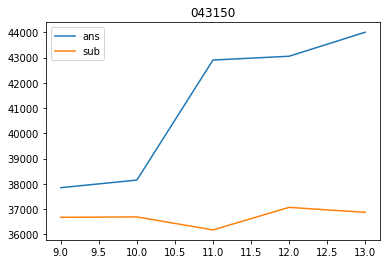

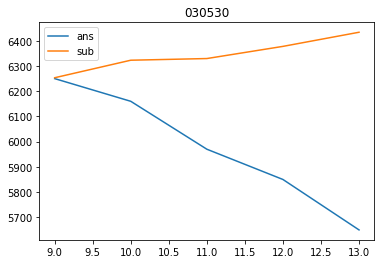

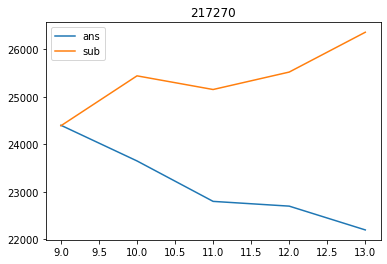

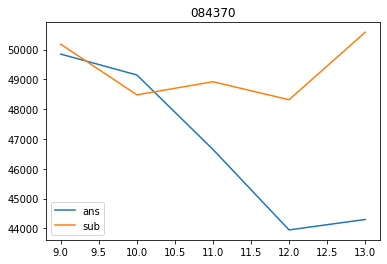

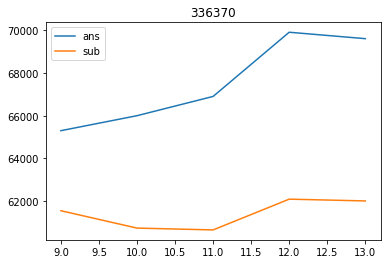

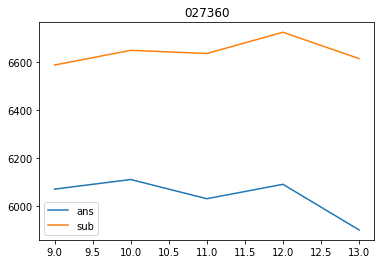

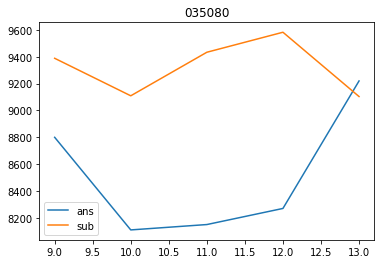

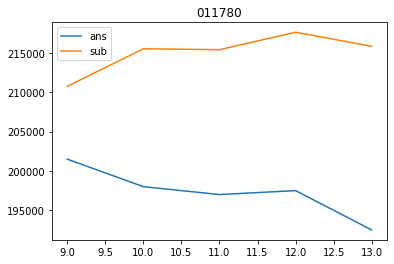

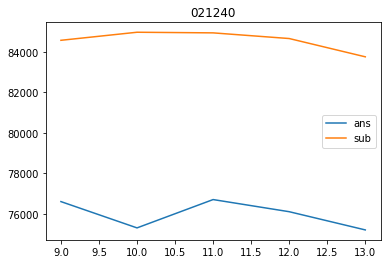

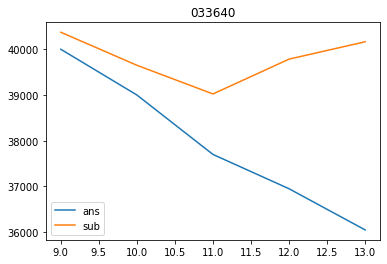

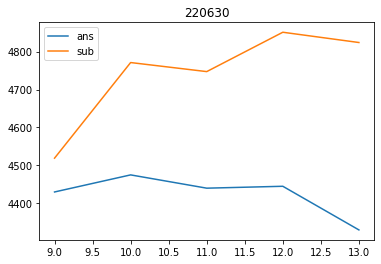

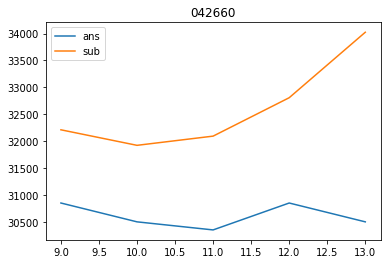

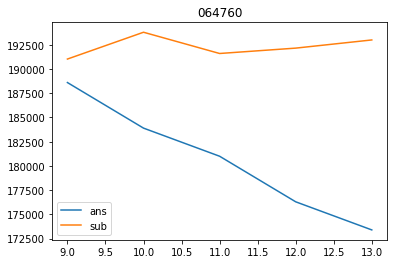

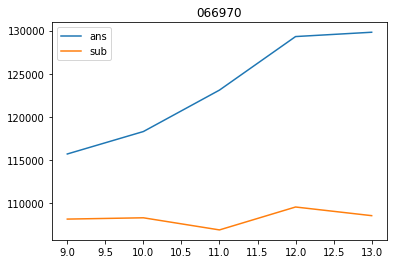

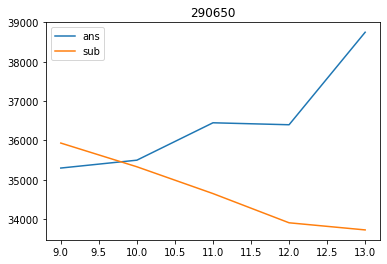

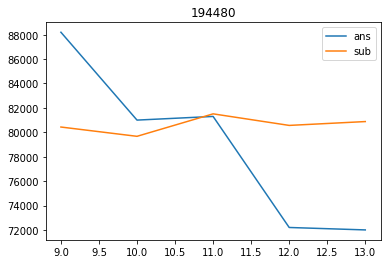

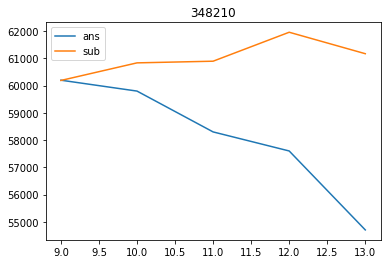

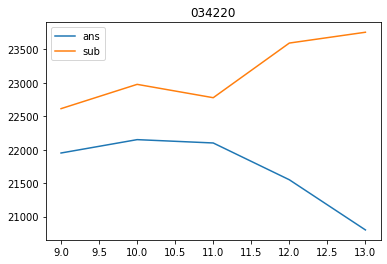

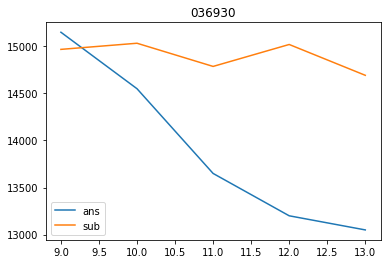

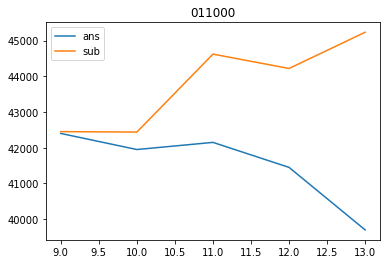

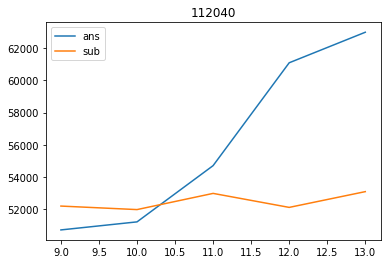

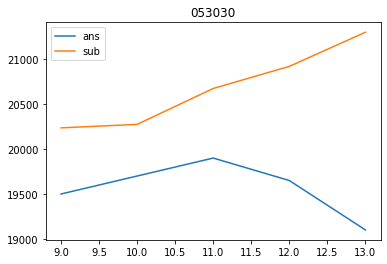

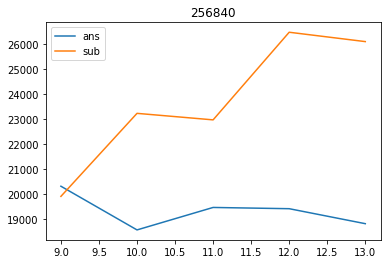

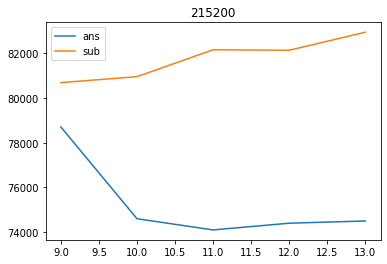

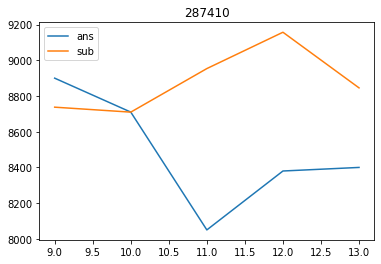

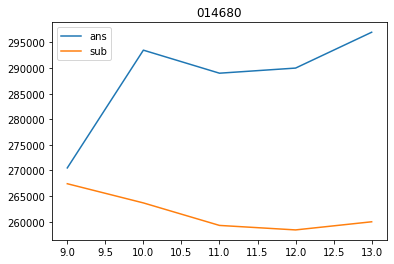

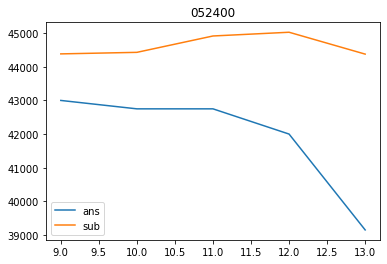

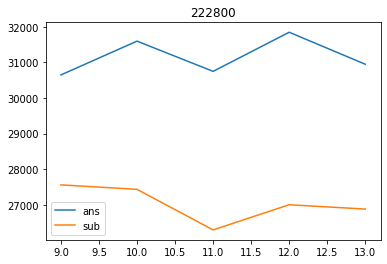

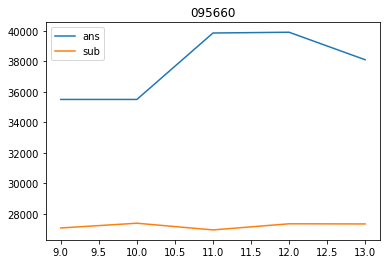

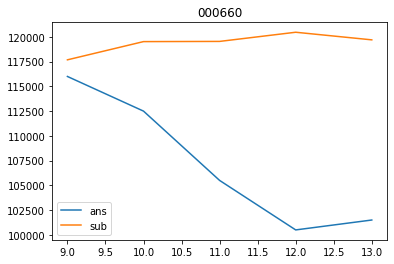

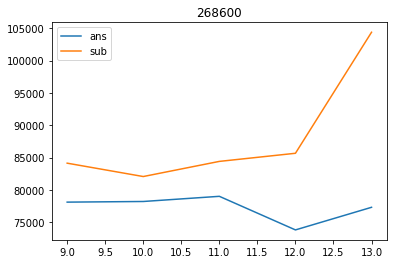

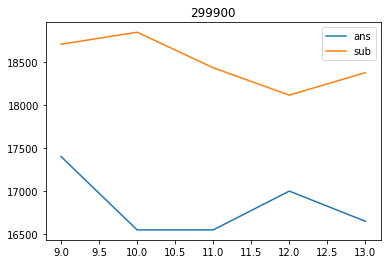

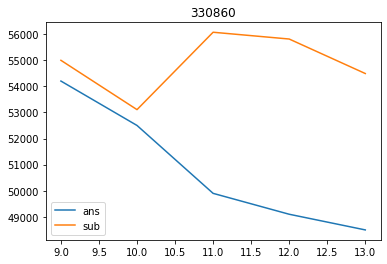

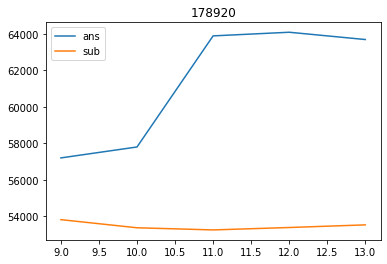

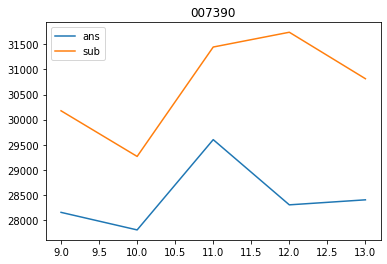

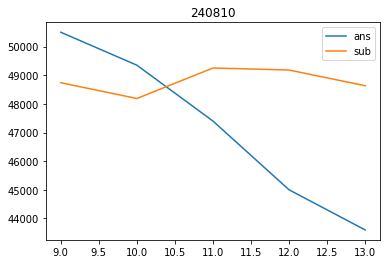

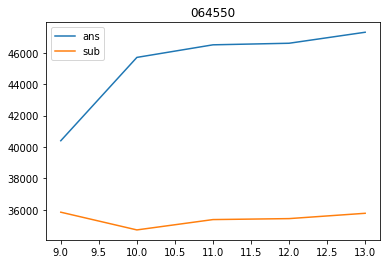

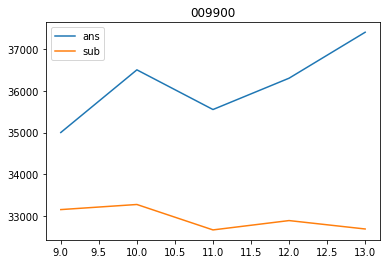

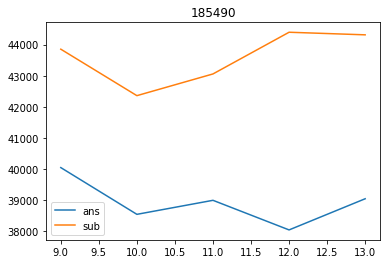

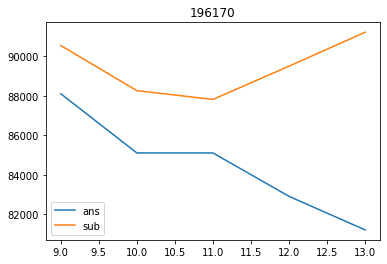

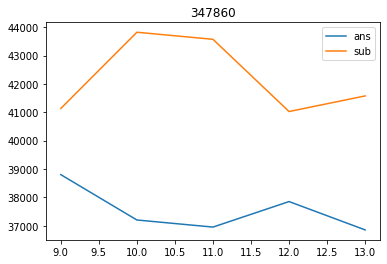

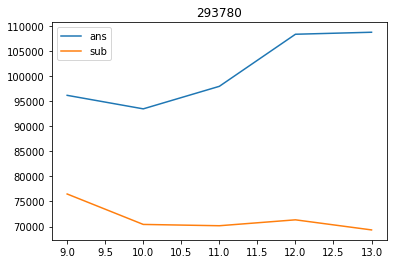

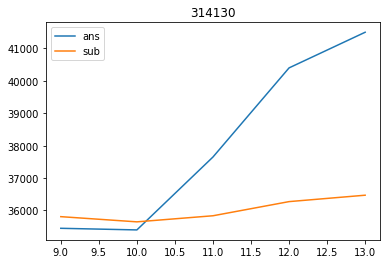

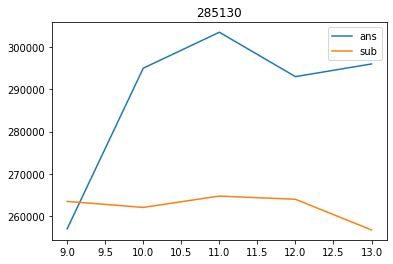

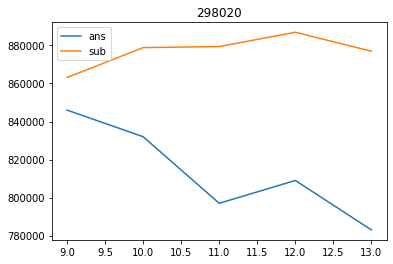

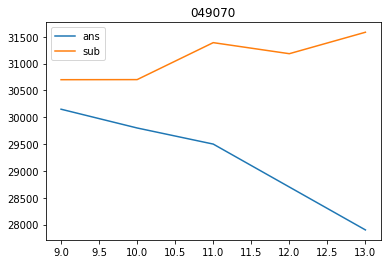

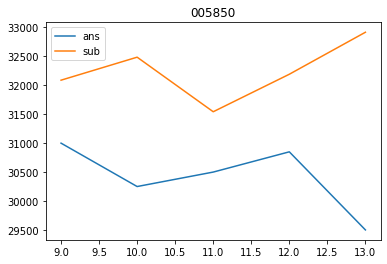

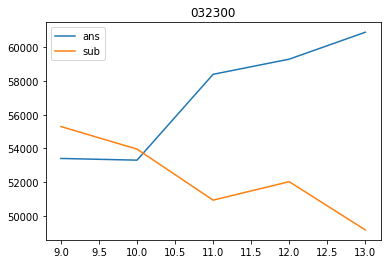

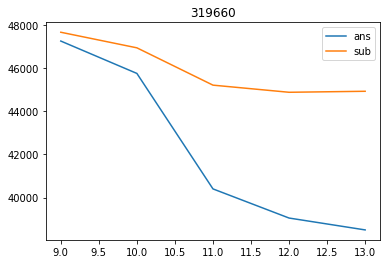

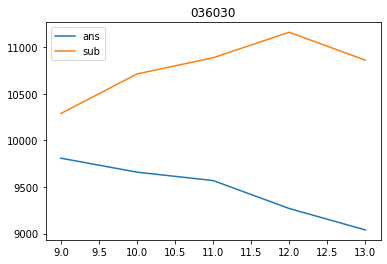

In [ ]:
import matplotlib.pyplot as plt

stock_list
for stock in list(set(list(acc_chk.iloc[:,1:].max().sort_values(ascending=False)[:50].index))):
    plt.plot([9,10,11,12,13], ans[stock][:6])
    plt.plot([9,10,11,12,13], sub[stock][:5])
    plt.legend(['ans', 'sub'])    
    plt.title(stock)
    plt.show()

https://psystat.tistory.com/117

In [ ]:
import pandas as pd

a = pd.read_csv('my_submission (10).csv')
b = pd.read_csv('my_submission (11).csv')
c = pd.read_csv('my_submission (12).csv')

sub = a.copy()

sub.iloc[:,1:] = a.iloc[:,1:]*0.4 + b.iloc[:,1:]*0.3 + c.iloc[:,1:]*0.3
sub.to_csv('ensemble_test.csv',index=False)